# Experiments for deep cognitive drone mapping

In [1]:
# =============== Processing graph =====================
#
#                      image
#                        |
#                        | variable name: img
#                        v
#           ---------------------------
#           |mid_level_representations| directly with visualpriors pip install
#           ---------------------------
#                        |
#                        | variable name: mid_level
#                        v
#               ---------------------
#               |  fc ->  decoder   |  content : two functions, fully-connected layer "fc" and decoder resnet "decoder"
#               ---------------------
#                        |
#                        | variable name: map_update
#                        v
#                   -------------        -----------------
#  TODO: Implement  |  combine  |   <--  |   transform   | <--- previous_map
#                   -------------        -----------------
#                        |
#                        | variable name: map
#                        v
#                 ---------------
#  TODO: Implement|   policy    |
#                 ---------------
#                        |
#                        |
#                        v
#                   velocities
#

## Mid-level test

download image to debug...
Passing mid level encoder...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done!


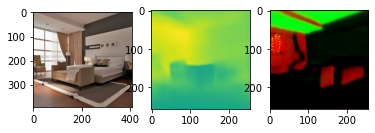

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from experiment import *
image, depth, normal = mid_level()

f, axarr = plt.subplots(1,3) 

axarr[0].imshow(image)
axarr[1].imshow(np.array(depth[0][0]))
axarr[2].imshow(np.array(normal.permute(1,2,0)))

In [3]:
pixgrid = -np.array(depth[0][0])*100

xx, yy = np.mgrid[0:pixgrid.shape[0], 0:pixgrid.shape[1]]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, pixgrid ,rstride=1, cstride=1, cmap=plt.cm.jet,
        linewidth=0)

plt.show()



## Reshaping functions

download image to debug...
Done!


/Users/renard/miniconda3/envs/habitat/lib/python3.6/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


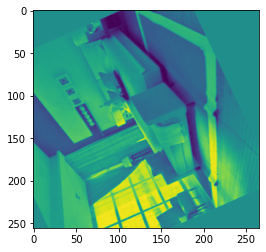

In [ ]:
from experiment import *

cogmap, transformed_map = test_geom_transform(0,.2,2)
plt.imshow(transformed_map[0,0,:,:])

# Testing the mid level function

In [1]:
from config import *
from PIL import Image
from networks.encoder_mid_level import mid_level_representations
from networks.fc import FC
import torchvision.transforms.functional as TF

from networks.decoder_residual import UpResNet
import config 

image = Image.open('test.png')
img = TF.to_tensor(TF.resize(image, 256)) * 2 - 1
img = img.unsqueeze(0)                              # (1,3,256,256)
img = img.repeat(BATCHSIZE, 1, 1, 1)                # (BATCHSIZE x 3 x 256 x 256) tensor


#==========Mid level encoder==========
print("Passing mid level encoder...")
mid_level=mid_level_representations(img,REPRESENTATION_NAMES)

print(mid_level.size()    )

mid_level_flat = mid_level.view(BATCHSIZE,-1)
mid_level_flat.size()

fc = FC()   

post_fc = fc(mid_level_flat)
print(post_fc.size())

concat = post_fc.view(BATCHSIZE,8*2,16,16)

print(concat.size())

decoder = UpResNet(layers=RESIDUAL_LAYERS_PER_BLOCK,channels=RESIDUAL_NEURON_LISTS,strides=STRIDES).to(DEVICE)


map_update = decoder(concat)

print(map_update.size())

ModuleNotFoundError: No module named 'config'